# 1163번

[증가하는 리스트](https://www.acmicpc.net/problem/1163)

- $a_{n+1} > a_n$

- $a_{n+1} = \text{lexicographically smallest integer among all } x \in \mathbb{Z}_{> 0} \text{ such that } x > a_n$

[, 0 1 2 3 4 5 6 7 8 9]

규칙 찾기..?
1. 시작부터 물음표가 등장한다면, 맨 처음 물음표에는 `,`이나 `0`이 올 수 없음.
2. `,` 다음에는 `0`이 올 수 없음.
3. 사전식 배열, 이건 뭐 무한루프라고 봐야 됨. 근데 **문자열 길이**, **숫자의 위치와 갯수**, **쉼표의 위치와 갯수**가 가능한 배열을 한정시켜주고 있음.

- 온리 물음표
- 물음표 + 숫자
- 물음표 + 쉼표
- 물음표 + 숫자 + 쉼표

앞에서부터 하나씩 채워보는 알고리즘?
???????

새로운 빈 리스트 채워가기?

In [78]:
list_ = sorted([',', '?', '0', '1', '2', '3', '8'])
print(list_)

[',', '0', '1', '2', '3', '8', '?']


In [77]:
# k = list("?2?5??7?,??")
# k

str(11) < str(100)

False

진짜 이건 도저히 모르겠음...

# 1334번

[다음 팰린드롬 수](https://www.acmicpc.net/problem/1334)

레전드 다중 `if` 발생.

대부분 다 통과하는데, 뭐가 하나 걸리는 거 같음.

int로 바꾸는 과정에서 슬라이싱할 때, 맨 앞자리가 0이면 누락되는 케이스...?

1. 일단 $2n-1$자리 수일 때.

left, center, right로 나눠보자.

- Case 1. 12345

    - 가운데 수 기준으로 나눠서(12 3 45) 데칼코마니 비교 ㄱㄱ
    - 45가 21보다 크니? -> `True` 가운데 수 1 키우고, 21로 맞춰주기.

- Case 2. 85345

    - 45가 58보다 크니? -> `False` 가운데 수 키울 필요 없음. 그냥 58로 맞춰주기.

- Case 3. 12945
    - 똑같이 가운데 1 키워야 되는데
    - 가운데가 9라서, 키우면 12가 13으로 변함. -> 13031

- Case 4. 868
    - 양 쪽이 똑같음. -> 878

- Case 5. 898
    - 양 쪽이 똑같음 -> 909
    
- Case 6. 999
    - 전부다 9
    - Case 5 처럼 계산해봤는데 자릿수가 바뀌어버림.
    - 그냥 마지막에 예외처리 할까. 

- 대충 알 수 있음. 가운데가 9일 경우 워크플로우.
    - 가운데 0
    - 왼쪽에 +1
    - 오른쪽에 데칼코마니





2. 그 다음 $2n$자리 수일 때.

- Case 1. 1234
    - 21 < 34 -> 1331 
    - 가운데가 없으니, 어떻게든 왼쪽이 영향을 받음
    - 9의 경우도 따로 생각할 필요 없을 거 같음.

- Case 2. 3412
    - 43 > 12 -> 3443

In [1]:
def decalcomanie(n):
    if len(str(n)) == 1:
        return [n]
    elif len(str(n)) % 2:
        center = str(n)[len(str(n))//2]
        left = str(n)[:len(str(n))//2]
        right = str(n)[len(str(n))//2 + 1:]
        return [int(left[::-1]), int(center), int(right)]
    else:
        left = str(n)[:len(str(n))//2]
        right = str(n)[len(str(n))//2:]
        return [int(left[::-1]), int(right)]

In [4]:
decalcomanie(1234567)
# decalcomanie(12345678)

[321, 4, 567]

In [9]:
n = int(input())
dec = decalcomanie(n)

# 홀수자릿수
if len(str(n)) % 2: 
    if dec[0] > dec[-1]:
        answer = str(n)[:len(str(n))//2+1] + str(dec[0])
    elif dec[0] < dec[-1]:
        if dec[1] == 9:
            answer = str(int(str(dec[0])[::-1]) + 1) + '0' + str(int(str(dec[0])[::-1]) + 1)[::-1]
        else:
            answer = str(n)[:len(str(n))//2] + str(dec[1]+1) + str(dec[0])
    elif dec[0] == dec[-1]:
        answer = str(n)[:len(str(n))//2] + str(dec[1]+1) + str(dec[-1])

# 짝수자릿수
else:
    if dec[0] > dec[-1]:
        answer = str(dec[0])[::-1] + str(dec[0])
    else:
        answer = str(int(str(dec[0])[::-1]) + 1) + str(int(str(dec[0])[::-1]) + 1)[::-1]

# 생각해보니 단위가 바뀌어버리는 케이스도 있음.
if set(str(n)) == set('9'):
    answer = '1' + '0' * (len(str(n)) - 1) + '1'

print(int(answer))

13031


# 1194번

[달이 차오른다, 가자.](https://www.acmicpc.net/problem/1194)

$min(\text{cur} \rightarrow \text{exit})$

In [1]:
way = '.'
wall = '#'
key = {
    'a':'A',
    'b':'B',
    'c':'C',
    'd':'D',
    'e':'E',
    'f':'F'
}
cur = '0'
exit = '1'

In [5]:
n = 7
m = 8

maze = [[None for _ in range(n)] for _ in range(m)]
maze

for i in maze:
    for j in i:
        print(j, end= '')
    print()

NoneNoneNoneNoneNoneNoneNone
NoneNoneNoneNoneNoneNoneNone
NoneNoneNoneNoneNoneNoneNone
NoneNoneNoneNoneNoneNoneNone
NoneNoneNoneNoneNoneNoneNone
NoneNoneNoneNoneNoneNoneNone
NoneNoneNoneNoneNoneNoneNone
NoneNoneNoneNoneNoneNoneNone


# 1019번

[책 페이지](https://www.acmicpc.net/problem/1019)

<span style="color:#900C3F">죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어죽어</span>

진짜 이게 맞냐...

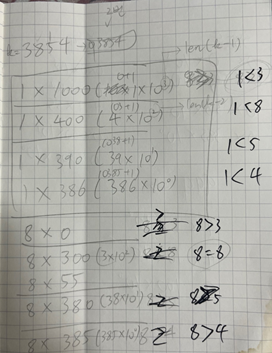
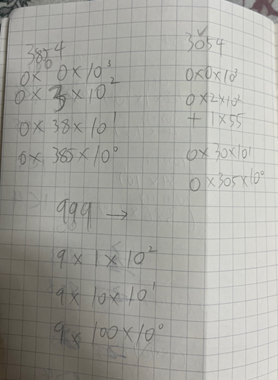

In [ ]:
# 검산용 코드. 작은 수만 넣으세요. 반복문이라 큰 수 넣으면 터져요.
n = int(input("검산할 대상 숫자를 입력하세요: "))
k = input("어떤 숫자를 세어볼까요?:" )
print(f"총: {n}페이지에서 숫자 {k}를 세어볼게요.")

count_ = 0
for i in range(1, n+1):      #   1부터 n까지.
    count_ += str(i).count(k)

print(f"{k}은(는) 총 {count_}개 있어요.")

총: 0페이지에서 숫자 0를 세어볼게요.
0은(는) 총 0개 있어요.


In [ ]:
n = int(input())
pages = '0' + str(n)            # 첫 0은 인덱싱 및 슬라이싱의 편의성을 위한 도구
list_ = [0 for _ in range(10)]  # 0부터 9까지의 count를 저장할 공간

for i in range(1, len(pages)):
    for j in range(10):
        if int(pages[i]) > j:
            list_[j] += (int(pages[:i]) + 1) * 10 ** (len(str(n)) - i)

        elif int(pages[i]) < j:
            list_[j] += int(pages[:i]) * 10 ** (len(str(n)) - i)

        else:    # 둘이 같은 숫자일 때
            if not pages[i+1:]:     # pages[i+1:]가 비어있으면 계산에 넣으면 안됨.
                list_[j] += int(pages[:i]) * 10 ** (len(str(n)) - i) + 1
            else:
                list_[j] += int(pages[:i]) * 10 ** (len(str(n)) - i) + int(pages[i+1:]) + 1

        if j == 0:      # pages에 붙인 맨 처음 0 때문에 miscount 생김. 이 부분은 후처리.
            list_[j] -= 10 ** (len(str(n)) - i)
            

for i in list_:
    print(i, end = ' ')

429904664 541008121 540917467 540117067 533117017 473117011 429904664 429904664 429904664 429904664 